Topic Modeling with BERT

In [ ]:
!pip install bertopic

# Importing necessary libraries
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# Load the Yelp Review data
reviews = pd.read_csv('/content/sample_data/restaurant_reviews_az.csv')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 28.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 20.5 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.8 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039287 sha256=8ebd7d4f4c915c010543780658e1070296ba4c3b6cfe3ddc9eab5d067a0c5dca
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-

Visualizing the distribution of review length

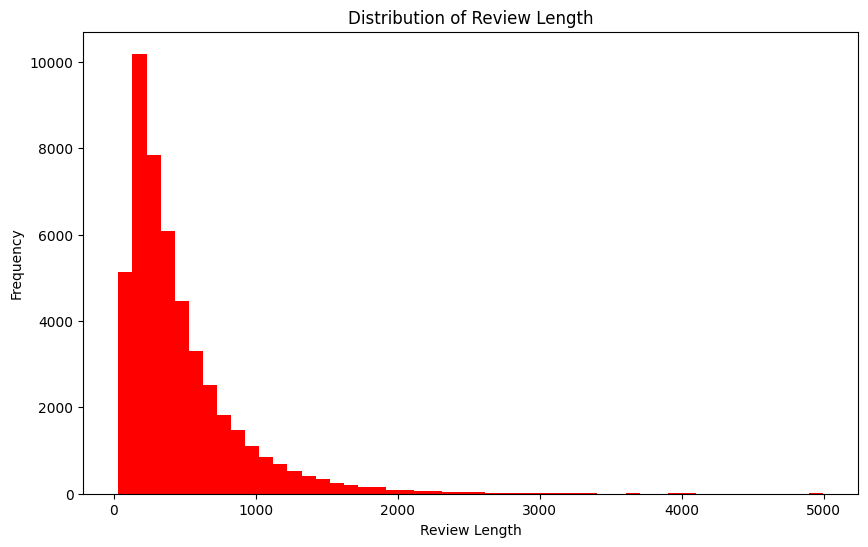

In [ ]:
import matplotlib.pyplot as plt

# Calculate review length
reviews['review_length'] = reviews['text'].apply(len)

# Plotting the distribution of review length
plt.figure(figsize=(10, 6))
plt.hist(reviews['review_length'], bins=50, color='red')
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

BERTopic Model with UMAP

In [ ]:
from umap import UMAP
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  metric='cosine',
                  random_state=42)
# Initiate BERTopic
model = BERTopic(umap_model=umap_model, calculate_probabilities=True, verbose=True)
# Run BERTopic model
topics, probs = model.fit_transform(reviews['text'])

2024-02-26 01:08:15,052 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1505 [00:00<?, ?it/s]

2024-02-26 01:09:28,643 - BERTopic - Embedding - Completed ✓
2024-02-26 01:09:28,644 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-26 01:10:46,766 - BERTopic - Dimensionality - Completed ✓
2024-02-26 01:10:46,769 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-26 01:13:37,586 - BERTopic - Cluster - Completed ✓
2024-02-26 01:13:37,608 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-26 01:13:44,003 - BERTopic - Representation - Completed ✓


 Visualizing the most relevant words for the top 10 topics

In [ ]:
model.visualize_barchart(top_n_topics=10)

Visualizing the topic hierarchy for the top 30 topics

In [ ]:
model.visualize_hierarchy(top_n_topics=30)

Reducing the number of topics to 15 and visualizing the most relevant words for each topic and the topic hierarchy

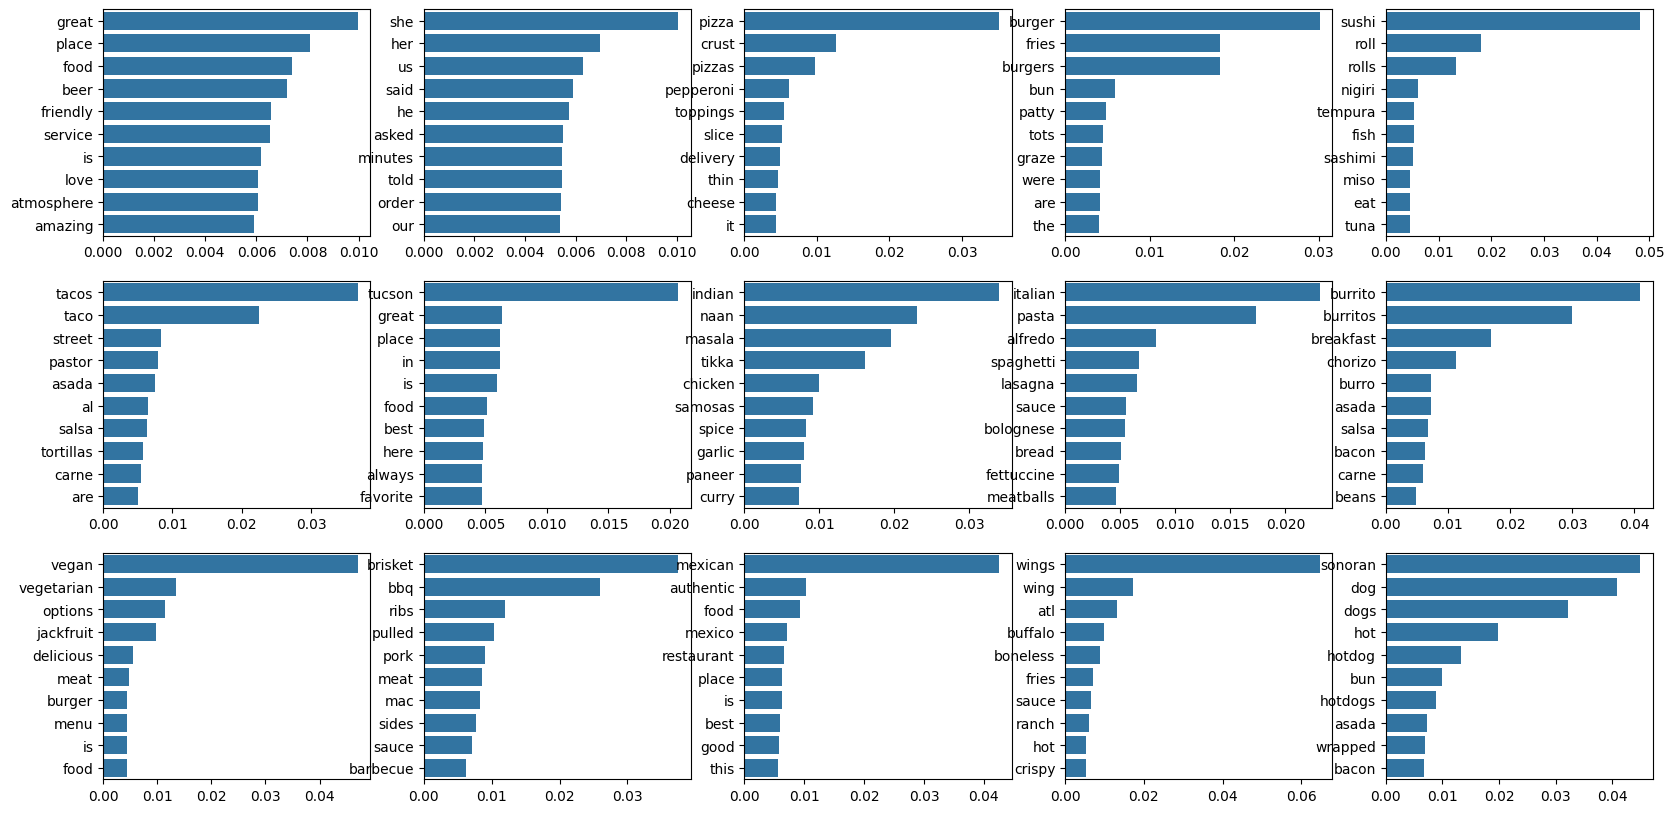

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

topic_freq = model.get_topic_freq().head(16)
top_topics = topic_freq['Topic'][1:]

plt.figure(figsize=(20, 10))

for i, topic in enumerate(top_topics, start=1):
    plt.subplot(3, 5, i)
    words, scores = zip(*model.get_topic(topic))
    sns.barplot(x=np.array(scores), y=np.array(words))

plt.show()

In [ ]:
# Visualize the hierarchy of the top 15 topics
model.visualize_hierarchy(top_n_topics=15)

Getting the topic allocation of the first 5 reviews in the data

In [ ]:
# Select the first 5 reviews from  dataset
first_five_reviews = reviews['text'].head(5)
topics, probs = model.transform(first_five_reviews)

# Print the topic allocation for each review
for i, (topic, probability) in enumerate(zip(topics, probs), start=1):
    print(f"Review {i}: Assigned Topic {topic}, Probability {max(probability):.4f}")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-02-26 01:40:53,252 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-02-26 01:41:12,713 - BERTopic - Dimensionality - Completed ✓
2024-02-26 01:41:12,715 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-02-26 01:41:12,719 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2024-02-26 01:41:12,801 - BERTopic - Probabilities - Completed ✓
2024-02-26 01:41:12,802 - BERTopic - Cluster - Completed ✓


Review 1: Assigned Topic 191, Probability 0.1168
Review 2: Assigned Topic -1, Probability 0.3195
Review 3: Assigned Topic 8, Probability 0.0912
Review 4: Assigned Topic -1, Probability 0.1001
Review 5: Assigned Topic -1, Probability 0.3157


Using get_topic() to show most relevant words for the first topic

In [ ]:
# Retrieve the most relevant words for Topic 191
topic_words = model.get_topic(191)

# Print the most relevant words for Topic
print("Most relevant words for Topic 191:")
for word, score in topic_words:
    print(f"{word}: {score:.4f}")

Most relevant words for Topic 191:
business: 0.0322
tucsontoptier: 0.0298
mindblowing: 0.0291
elements: 0.0277
category: 0.0275
dime: 0.0274
money: 0.0252
whim: 0.0247
worthy: 0.0246
costs: 0.0231


Topic 191

The topic seems to focus on the value or quality assessment of a business or service, considering aspects like cost-effectiveness, exceptional quality, and strategic choices.

Topic 0

This topic likely reflects reviews or discussions that praise aspects contributing to enjoyable and memorable visits, such as great culinary offerings, a welcoming atmosphere, and excellent customer service.

Topic 1

The words associated with this topic suggest a narrative or conversational context, likely focusing on interactions or experiences involving service or communication, possibly in a customer service setting.


Topic 8

Topic 8 indicates a clear focus on Italian cuisine, highlighting a variety of classic dishes such as pasta and lasagna and key components associated with this culinary tradition.

Topic 9

The words for Topic 9 strongly suggest a focus on Mexican or Tex-Mex cuisine, specifically highlighting various types of burritos and kinds of salsas.

Visualizing the topic frequency of the top 6 topics over time with the entire dataset.

Batches:   0%|          | 0/1505 [00:00<?, ?it/s]

2024-02-26 02:09:56,689 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-02-26 02:09:56,819 - BERTopic - Dimensionality - Completed ✓
2024-02-26 02:09:56,820 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-02-26 02:10:00,666 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2024-02-26 02:13:14,180 - BERTopic - Probabilities - Completed ✓
2024-02-26 02:13:14,186 - BERTopic - Cluster - Completed ✓


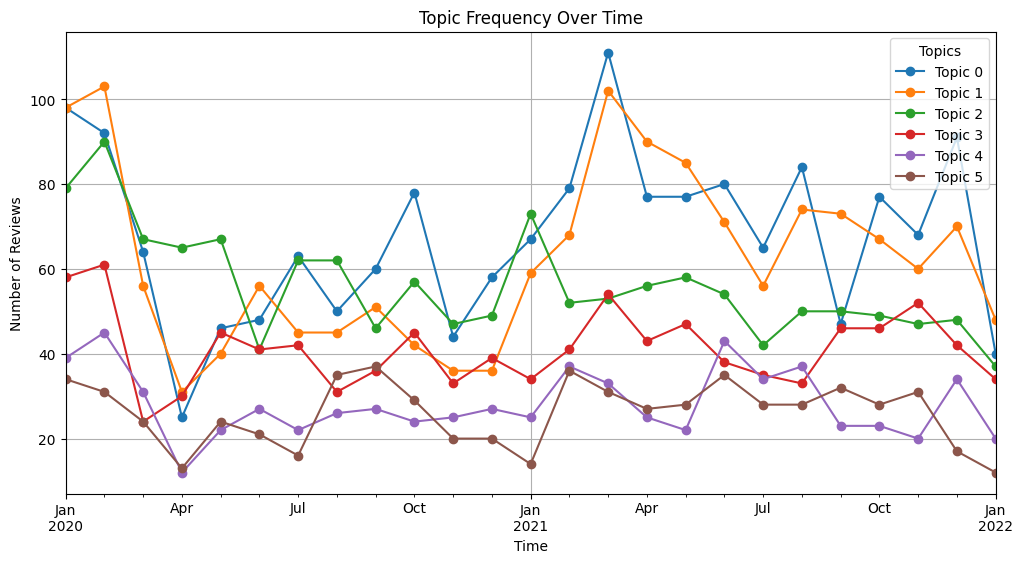

In [ ]:
reviews['date'] = pd.to_datetime(reviews['date'])
topics, _ = model.transform(reviews['text'])
reviews['AssignedTopic'] = topics

top_6_topics = reviews[reviews['AssignedTopic'] != -1]['AssignedTopic'].value_counts().nlargest(6).index.tolist()

# Create a new DataFrame to hold aggregated data
df_time_series = pd.DataFrame()

for topic in top_6_topics:
    topic_series = reviews[reviews['AssignedTopic'] == topic].resample('M', on='date').size()
    df_time_series[f'Topic {topic}'] = topic_series

df_time_series = df_time_series.fillna(0)

df_time_series.plot(figsize=(12, 6), marker='o', title='Topic Frequency Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.legend(title='Topics')
plt.grid(True)
plt.show()

Visualizing the topics per star rating

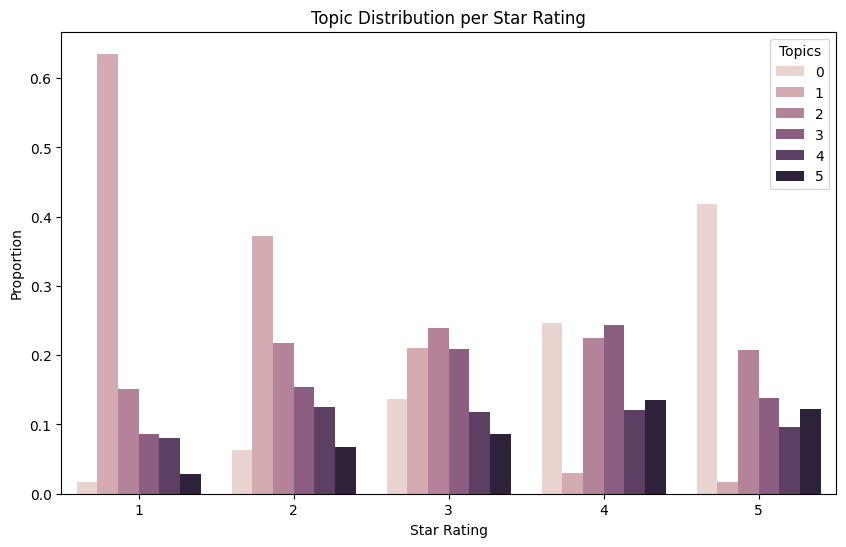

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

top_6_topics = reviews[reviews['AssignedTopic'] != -1]['AssignedTopic'].value_counts().nlargest(6).index.tolist()

pivot_data = reviews[reviews['AssignedTopic'].isin(top_6_topics)].pivot_table(index='stars', columns='AssignedTopic', aggfunc='size', fill_value=0)
pivot_normalized = pivot_data.div(pivot_data.sum(axis=1), axis=0).reset_index()
melted_data = pivot_normalized.melt(id_vars='stars', var_name='Topic', value_name='Proportion')

plt.figure(figsize=(10, 6))
sns.barplot(x='stars', y='Proportion', hue='Topic', data=melted_data)
plt.title('Topic Distribution per Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Proportion')
plt.legend(title='Topics')
plt.show()

From the Topic Frequency Over Time Graph, some observations could be made:

There's a noticeable spike in Topic 0 early in 2020, which then drops sharply and continues with fluctuations but at a lower level.
Topic 2 also shows a significant peak around October 2021.
Topic 5 remains relatively low in frequency throughout the period.
The graph overall shows seasonality or specific events that trigger discussions about certain topics at different times.

Good Experiences: Based on the topic disctribution per star rating, the major topic (maybe Topic 4) associated with good experiences is prominently mentioned in 5-star reviews. This topic could be related to excellent service, food quality, or ambiance – aspects commonly associated with positive dining experiences.
Bad Experiences: Conversely, the topics most associated with bad experiences (Topic 0 and 3) dominate in 1-star reviews. These might pertain to poor customer service, long wait times, unclean environments, or poor food quality.

Specifying a few topics in the restaurant reviews and using zero shot topic modeling to create a topic model

In [ ]:
!pip install transformers

from transformers import pipeline
from bertopic.representation import KeyBERTInspired
zeroshot_topic_list = ["Ambiance", "Price", "Hygiene", "Wait Time", "Portion Size"]

model1 = BERTopic(
    embedding_model="thenlper/gte-small",
    min_topic_size=5,
    zeroshot_topic_list=zeroshot_topic_list,
    zeroshot_min_similarity=.75,
    representation_model=KeyBERTInspired()
)
topics, _ = model1.fit_transform(reviews.text)

model1.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,19245,Ambiance,"[restaurant, tacos, tucson, food, delicious, p...",[Good Mexican food abounds in Tucson. El Charr...
1,1,11647,Portion Size,"[food, restaurant, eat, pizza, delicious, meal...","[My son ordered takeout from Jun Dynasty, yest..."
2,2,10851,Wait Time,"[restaurant, food, waited, service, wait, went...",[Keep in mind this review is for one visit dur...
3,3,3606,Price,"[restaurant, food, pizza, delicious, prices, m...",[We stayed here for 2 nights during new years ...
4,4,2743,Hygiene,"[restaurant, disgusting, food, eat, bad, dirty...",[Rant. I'm not usually the one to put any busi...
5,5,14,-1_burger_delicious_burgers_toppings,"[burger, delicious, burgers, toppings, pizza, ...",[Wow! This is the BEST ramen in town! We calle...
6,6,15,0_tacos_taco_salsas_mexican,"[tacos, taco, salsas, mexican, salsa, deliciou...",[The best vegetarian tacos I've ever had - act...
7,7,14,1_thai_ramen_food_curry,"[thai, ramen, food, curry, noodles, delicious,...",[This has got to be the best Thai food I've ev...
8,8,12,2_pizza_tasted_restaurant_cheese,"[pizza, tasted, restaurant, cheese, sauce, tas...",[What happened to this spot?! Used to be so go...


Visualizing the most relevant words for the top 10 topics and the topic hierarchy for the zero shot topic model

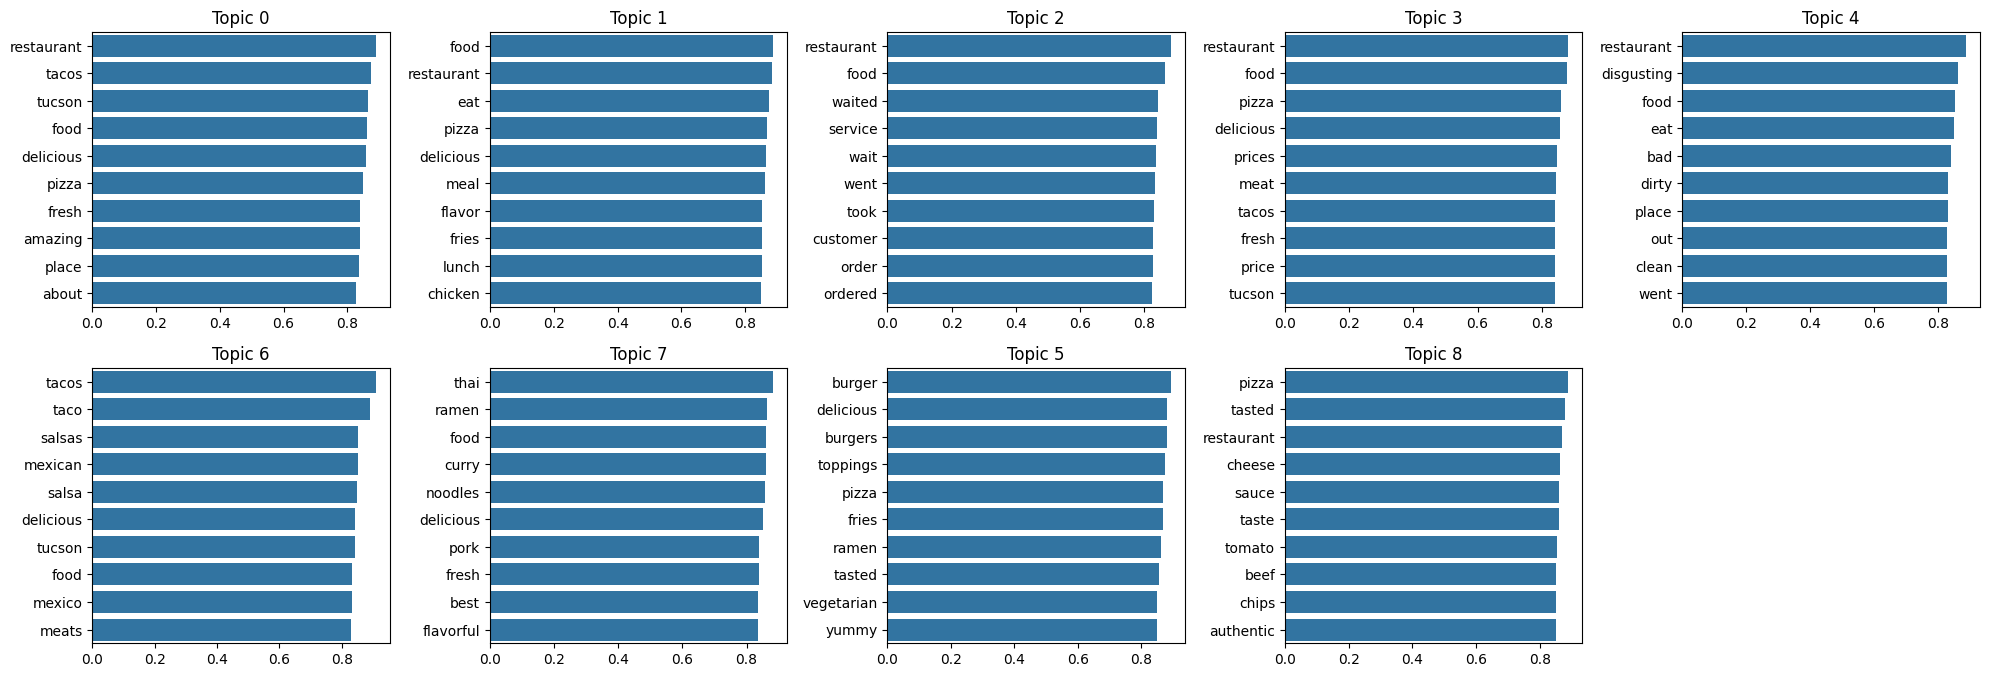

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

topic_freq = model1.get_topic_freq().head(10)
top_topics = topic_freq['Topic'][0:]

plt.figure(figsize=(20, 10))

for i, topic in enumerate(top_topics, start=1):
    plt.subplot(3, 5, i)
    words, scores = zip(*model1.get_topic(topic))
    sns.barplot(x=np.array(scores), y=np.array(words))
    plt.title(f"Topic {topic}")

plt.tight_layout()
plt.show()

In [ ]:
model1.visualize_hierarchy(top_n_topics=10)

Topic 0: This seems to focus on positive experiences at restaurants serving Mexican cuisine, with specific mentions of tacos and pizza, suggesting a fusion or variety in offerings. The words "delicious," "fresh," and "amazing" imply favorable reviews.

Topic 1: The topic is related to fast food or casual dining experiences, with an emphasis on items like pizza, fries, and chicken. The presence of words like "eat," "meal," "flavor," and "lunch" indicates discussions about the dining experience and the food's taste.

Topic 2: Here, there is a focus on customer service and wait times, as evidenced by words like "waited," "service," "wait," and "customer." This might reflect experiences where service speed and quality were notable factors.

Topic 3: This topic seems to cover a mix of different cuisines with a focus on pricing and value for money. Words like "prices," "meat," "tacos," "fresh," and "price" suggest that reviewers are discussing the cost in relation to the quality of the food.

Topic 4: It revolves around negative dining experiences, highlighted by words such as "disgusting," "bad," "dirty," and "clean." This indicates reviews where hygiene and food quality were likely criticized.

Topic 5: This topic is difficult to interpret without more context, as the words are quite generic and could apply to various scenarios. It might represent general discussions about restaurants without a specific focus on either food or service.

Topic 6: Similar to Topic 0, this topic appears to focus on Mexican food, with mentions of "tacos," "salsa," "Mexican," and "delicious." This suggests a favorable view of the cuisine and its various dishes.

Topic 7: The topic revolves around American cuisine, with a particular focus on burgers, but also mentions pizza and ramen, indicating a variety of food types discussed. Words like "delicious," "toppings," and "yummy" point to positive reviews.

Topic 8: This topic seems to be about Italian cuisine, with specific mentions of "pizza," "cheese," "sauce," and "tomato," likely reflecting discussions about the quality of Italian dishes and their authenticity.